In [62]:
import sys
import networkx as nx
import matplotlib.pyplot as plt 


def prim_algorithm(matriz_adjacencia):
    V = len(matriz_adjacencia)
    
    # Inicializando o dicionário key, como as aresta e indica o caminho mínimo para ir de um vertice da arvore até um que não está.
    key = {edge: sys.maxsize for edge in range(V)}
    
    # Inicializando a lista parent, a qual vai dizer, de qual vértice precisamos sair para chegar até um elemento que não está na arvore
    parent = [None] * V
    
    # Configurando a primeira entrada para ser 0 e garantir que seja escolhida na primeira iteração
    key[0] = 0
    
    # Inicializando a lista Set_prim para saber se o vértice já está na árvore ou não
    Set_prim = [False] * V
    
    # Definindo que o primeiro elemento não tem pai
    parent[0] = -1
    
    # Fazendo um loop para iterar sobre todos os vértices
    for _ in range(V):
        
        # Definindo o valor mínimo como sys.maxsize e sem aresta
        min_val = sys.maxsize
        min_edge = None
        
        # Iterando sobre os elementos de key e Set_prim para encontrar o que tem menor valor e não está na árvore ainda
        for edge, weight in key.items():
            if weight < min_val and not Set_prim[edge]:
                min_val = weight
                min_edge = edge
        
        # Definindo a aresta como a mínima encontrada anteriormente
        u = min_edge
                
        # Colocando u na árvore
        Set_prim[u] = True

        # Iterando sobre os elementos da matriz
        for v in range(V):
            # Observando se a entrada da matriz é maior que 0, se ela já não está na árvore e se o elemento é menor que o máximo setado
            if matriz_adjacencia[u][v] > 0 and not Set_prim[v] and key[v] > matriz_adjacencia[u][v]:
                # Caso todas as condições forem satisfeitas, definimos o elemento da matriz como key
                key[v] = matriz_adjacencia[u][v]
                # e também definimos u como pai de v
                parent[v] = u

    return key, parent

# criando uma função para printar o caminho
def printMST(matriz_adjacencia):
    key, parent = prim_algorithm(matriz_adjacencia)
    # Mostrando o caminho
    print("Edge \tWeight")
    total_weight = 0
    for i in range(1, len(parent)):
        print(parent[i], "-", i, "\t", matriz_adjacencia[i][parent[i]])
        total_weight += matriz_adjacencia[i][parent[i]]
    
    # Printando o peso do caminho
    print(f"Total Weight: {total_weight}")

In [63]:
# Criando as funções pra desenhar os grafos:
def draw_graph(graph, pos=None, graph_title = "Graph"):

    # Criando o gráfico
    G = nx.Graph()

    # Adicionando as arestas com pesos com base na matriz de adjacência
    for i in range(len(graph)):
        for j in range(len(graph[i])):
            if graph[i][j] > 0:
                G.add_edge(str(i), str(j), weight=graph[i][j])

    # Desenhando o grafo
    if pos is None:
        pos = nx.spring_layout(G, seed=8)
    nx.draw(G, pos, with_labels=True, font_size=10, font_color="black", node_size=700, font_family="sans-serif")
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Plotando o grafo
    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.title(graph_title)

def draw_mst(graph, pos=None, graph_title = "Minimum Spanning Tree"):
    # Criando o grafo
    mst_graph = nx.Graph()

    # Pegando a chave e o dicionário do algoritmo de prim
    chaves_mst, pais_mst = prim_algorithm(graph)

    # Adicionando os vertices que queremos
    for key, value in chaves_mst.items():
        if key != 0:
            parent = pais_mst[key]
            mst_graph.add_edge(str(parent), str(key), weight=value)
        
    # Criando o grafo
    if pos is None:
        pos = nx.spring_layout(mst_graph, seed=7)
    nx.draw_networkx(mst_graph, pos, with_labels=True, font_size=10, font_color="black", node_size=700, font_family="sans-serif")
    edge_labels = nx.get_edge_attributes(mst_graph, 'weight')
    nx.draw_networkx_edge_labels(mst_graph, pos, edge_labels=edge_labels)

    # Plotando o grafo
    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.title(graph_title)


def grid_plot(matriz_adjacencia, graph_title="Grafo Original", mst_title="Arvore Geradora Mínima"):
    # Criando o grafo
    G = nx.Graph()

    # Adicionando as arestas com pesos com base na matriz de adjacência
    for i in range(len(matriz_adjacencia)):
        for j in range(len(matriz_adjacencia[i])):
            if matriz_adjacencia[i][j] > 0:
                G.add_edge(str(i), str(j), weight=matriz_adjacencia[i][j])

    pos = nx.spring_layout(G, seed=8)

    # Criando o grid e plotando
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    plt.sca(axes[0])
    draw_graph(matriz_adjacencia, pos, graph_title)
    plt.sca(axes[1])
    draw_mst(matriz_adjacencia, pos, mst_title)

    plt.tight_layout()
    plt.show()


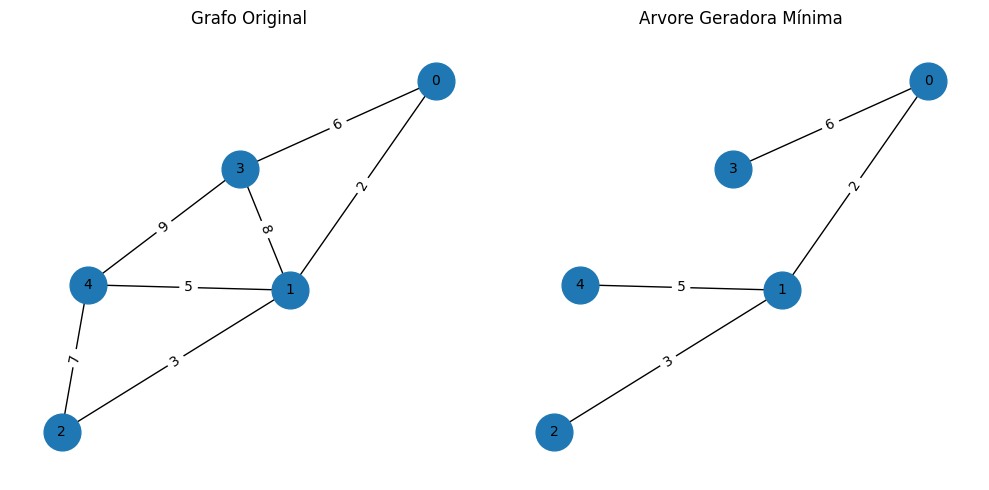

Edge 	Weight
0 - 1 	 2
1 - 2 	 3
0 - 3 	 6
1 - 4 	 5
Total Weight: 16


In [64]:
exemplo_1 = [
    [0, 2, 0, 6, 0],
    [2, 0, 3, 8, 5],
    [0, 3, 0, 0, 7],
    [6, 8, 0, 0, 9],
    [0, 5, 7, 9, 0]
]

grid_plot(exemplo_1)
printMST(exemplo_1)


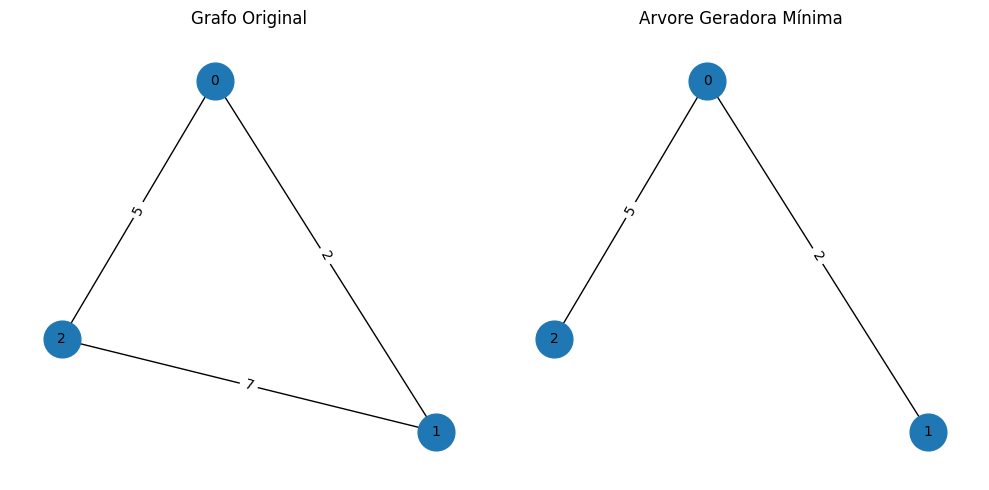

Edge 	Weight
0 - 1 	 2
0 - 2 	 5
Total Weight: 7


In [65]:
exemplo_2 =[
 [0, 2, 5],
 [2, 0, 7],
 [5, 7, 0],
 ]

grid_plot(exemplo_2)
printMST(exemplo_2)


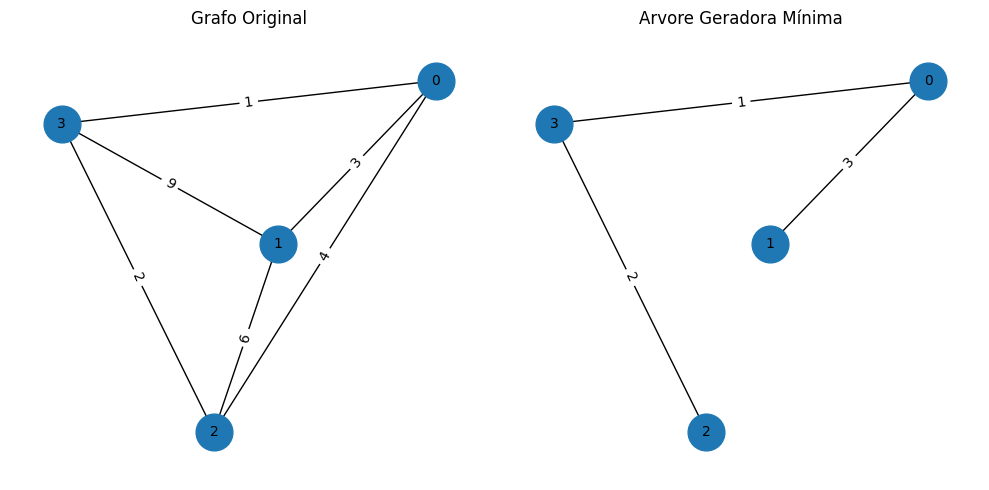

Edge 	Weight
0 - 1 	 3
3 - 2 	 2
0 - 3 	 1
Total Weight: 6


In [66]:
exemplo_3 = [
 [0, 3, 4, 1],
 [3, 0, 6, 9],
 [4, 6, 0, 2],
 [1, 9, 2, 0]
 ]

grid_plot(exemplo_3)
printMST(exemplo_3)



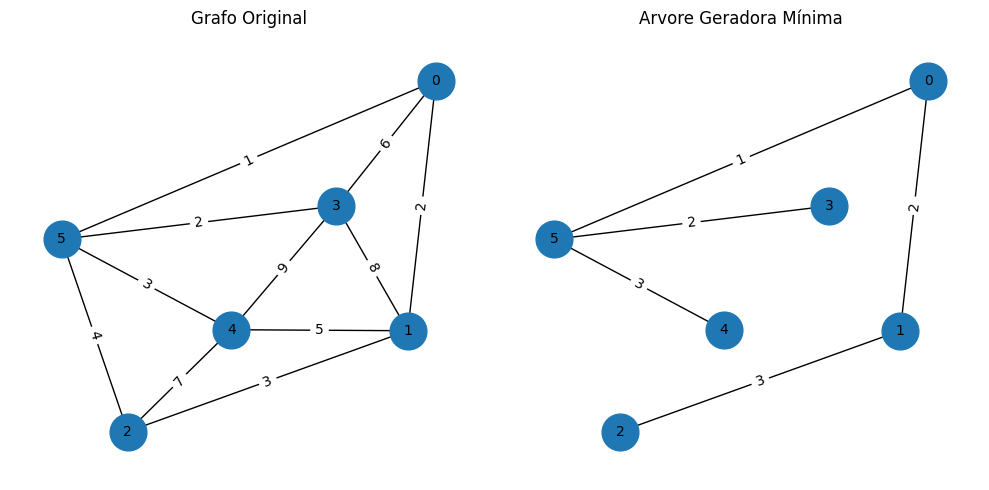

Edge 	Weight
0 - 1 	 2
1 - 2 	 3
5 - 3 	 2
5 - 4 	 3
0 - 5 	 1
Total Weight: 11


In [67]:
exemplo_4 = [
    [0, 2, 0, 6, 0, 1],
    [2, 0, 3, 8, 5, 0],
    [0, 3, 0, 0, 7, 4],
    [6, 8, 0, 0, 9, 2],
    [0, 5, 7, 9, 0, 3],
    [1, 0, 4, 2, 3, 0]
]

grid_plot(exemplo_4)
printMST(exemplo_4)
